<a href="https://colab.research.google.com/github/Manudrel/Treinamento-Rede-Yolo/blob/main/Rede_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q ultralytics
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.

In [2]:
import os
import shutil
from roboflow import Roboflow
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Carregando o dataset

rf = Roboflow(api_key="qyKom0bm9EevVXkyuRqf") # api_key ocultado, ao testar use a sua api_key
project = rf.workspace("emanuel-lxpvp").project("coco-gtbwl")
version = project.version(1)
dataset = version.download("yolov8")

dataset_path = dataset.location

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to COCO-Dataset-1 in yolov8:: 100%|██████████| 19530/19530 [00:05<00:00, 3896.50it/s]


In [5]:
# Treinando o modelo
model = YOLO("yolov8n.pt")

model.train(
    data= '/content/COCO-Dataset-1/data.yaml',
    epochs=30,
    imgsz=640,
)

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/COCO-Dataset-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

100%|██████████| 755k/755k [00:00<00:00, 25.8MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

Model summary: 129 layers, 3,157,200 parameters, 3,157,184 gradients, 8.9 GFLOPs

Transferred 355/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 104MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1660.1±632.6 MB/s, size: 54.0 KB)


train: Scanning /content/COCO-Dataset-1/train/labels... 6967 images, 68 backgrounds, 0 corrupt: 100%|██████████| 6967/6967 [00:05<00:00, 1318.32it/s]


train: New cache created: /content/COCO-Dataset-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1098.2±643.7 MB/s, size: 67.4 KB)


val: Scanning /content/COCO-Dataset-1/valid/labels... 1907 images, 14 backgrounds, 0 corrupt: 100%|██████████| 1907/1907 [00:02<00:00, 874.35it/s] 

val: New cache created: /content/COCO-Dataset-1/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       3.1G      1.205      3.861      1.217        105        640: 100%|██████████| 436/436 [02:45<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:19<00:00,  3.13it/s]


                   all       1907      13401      0.362      0.195      0.207      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.31G      1.211      2.096      1.231         83        640: 100%|██████████| 436/436 [02:39<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.63it/s]


                   all       1907      13401      0.528      0.376      0.379      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.32G        1.2       1.82      1.228         81        640: 100%|██████████| 436/436 [02:38<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.64it/s]


                   all       1907      13401      0.567      0.405      0.417      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.53G      1.198      1.729      1.227         73        640: 100%|██████████| 436/436 [02:36<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:17<00:00,  3.45it/s]


                   all       1907      13401      0.584      0.417      0.436      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.78G      1.184      1.654       1.22         86        640: 100%|██████████| 436/436 [02:36<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.67it/s]


                   all       1907      13401      0.587      0.417      0.441      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.79G      1.178      1.602      1.214        102        640: 100%|██████████| 436/436 [02:36<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:17<00:00,  3.42it/s]


                   all       1907      13401        0.6      0.411      0.451      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.81G      1.175      1.569      1.209         88        640: 100%|██████████| 436/436 [02:38<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.70it/s]


                   all       1907      13401      0.584      0.431      0.454      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.83G       1.17      1.544      1.209         79        640: 100%|██████████| 436/436 [02:38<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.63it/s]


                   all       1907      13401       0.57      0.445      0.463      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.85G      1.158       1.51      1.201         85        640: 100%|██████████| 436/436 [02:42<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.58it/s]


                   all       1907      13401      0.582      0.435      0.459      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.87G      1.151      1.501        1.2         31        640: 100%|██████████| 436/436 [02:42<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.56it/s]


                   all       1907      13401      0.616      0.431      0.465      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.88G      1.154      1.468      1.195        157        640: 100%|██████████| 436/436 [02:40<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:17<00:00,  3.45it/s]


                   all       1907      13401      0.596      0.433      0.466      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       3.9G      1.151      1.458      1.193         83        640: 100%|██████████| 436/436 [02:40<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:17<00:00,  3.48it/s]


                   all       1907      13401      0.588      0.447      0.473      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.92G      1.141      1.427      1.185         63        640: 100%|██████████| 436/436 [02:40<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:17<00:00,  3.43it/s]


                   all       1907      13401      0.595      0.445      0.471       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.94G      1.129      1.419      1.188         65        640: 100%|██████████| 436/436 [02:42<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:17<00:00,  3.45it/s]


                   all       1907      13401      0.614      0.438      0.476      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.96G      1.128      1.401      1.183         89        640: 100%|██████████| 436/436 [02:43<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:17<00:00,  3.52it/s]


                   all       1907      13401      0.586      0.451      0.474      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.97G      1.126        1.4      1.181         89        640: 100%|██████████| 436/436 [02:42<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.55it/s]


                   all       1907      13401      0.591      0.448      0.476      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.99G      1.126      1.395      1.182         83        640: 100%|██████████| 436/436 [02:42<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:17<00:00,  3.49it/s]


                   all       1907      13401       0.62       0.44      0.481      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.01G      1.117      1.366      1.175         64        640: 100%|██████████| 436/436 [02:41<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.63it/s]


                   all       1907      13401      0.625      0.447      0.485       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.03G      1.114      1.358      1.176         97        640: 100%|██████████| 436/436 [02:43<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.61it/s]


                   all       1907      13401      0.602       0.45      0.485       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.04G      1.108      1.336      1.169        115        640: 100%|██████████| 436/436 [02:41<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.63it/s]


                   all       1907      13401      0.601      0.456      0.484       0.34
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.06G      1.153      1.311      1.199        101        640: 100%|██████████| 436/436 [02:06<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.59it/s]


                   all       1907      13401      0.593       0.45      0.477      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.08G       1.13      1.252      1.189         30        640: 100%|██████████| 436/436 [02:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.60it/s]


                   all       1907      13401      0.633       0.44      0.478      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30       4.1G      1.121      1.228      1.184         33        640: 100%|██████████| 436/436 [02:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.64it/s]


                   all       1907      13401      0.594      0.455       0.48      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.12G      1.117      1.219      1.183         56        640: 100%|██████████| 436/436 [02:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.69it/s]


                   all       1907      13401      0.607      0.453      0.483       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.13G      1.115      1.198      1.177         34        640: 100%|██████████| 436/436 [02:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.68it/s]


                   all       1907      13401       0.61      0.453      0.485      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.15G       1.11      1.194      1.173         56        640: 100%|██████████| 436/436 [02:04<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.71it/s]


                   all       1907      13401       0.62      0.449      0.485      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.17G        1.1       1.17      1.169         43        640: 100%|██████████| 436/436 [02:05<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.66it/s]


                   all       1907      13401      0.626       0.45      0.489      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.19G      1.102      1.169      1.168         35        640: 100%|██████████| 436/436 [02:05<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.59it/s]


                   all       1907      13401      0.638      0.448      0.489      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.21G      1.095      1.162      1.164         28        640: 100%|██████████| 436/436 [02:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.68it/s]


                   all       1907      13401      0.631      0.449      0.489      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.22G      1.096      1.157      1.165         64        640: 100%|██████████| 436/436 [02:05<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:16<00:00,  3.70it/s]


                   all       1907      13401      0.616      0.457       0.49      0.345

30 epochs completed in 1.386 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:17<00:00,  3.34it/s]


                   all       1907      13401      0.619      0.456       0.49      0.345
              airplane         46         65      0.921      0.714      0.836      0.664
                 apple         34        151      0.372      0.344      0.263      0.181
              backpack         66        103      0.537      0.194      0.238      0.117
                banana         50        218      0.396      0.367      0.308      0.177
          baseball bat         42         73       0.64       0.26      0.325      0.151
        baseball glove         46         70       0.67        0.4      0.438      0.279
                  bear         13         18      0.807      0.778      0.748       0.64
                   bed         57         62      0.672      0.529      0.615      0.423
                 bench        106        182      0.458       0.22      0.259      0.155
               bicycle         64        143      0.608      0.364      0.414      0.238
                  bir

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78,
       79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e1753d98a50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,

In [6]:
# Função para mostrar imagem
def mostrar(frame):
    imagem = cv2.imread(frame)
    if imagem is None:
        print(f"Erro: imagem '{frame}' não encontrada.")
        return
    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
    plt.show()

In [17]:
# Upload e inferência em uma nova imagem
uploaded = files.upload()
image_path = next(iter(uploaded))

Saving imagem_2025-07-04_195710272.png to imagem_2025-07-04_195710272.png



image 1/1 /content/imagem_2025-07-04_195710272.png: 448x640 1 cat, 1 dog, 2 persons, 46.9ms
Speed: 2.5ms preprocess, 46.9ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


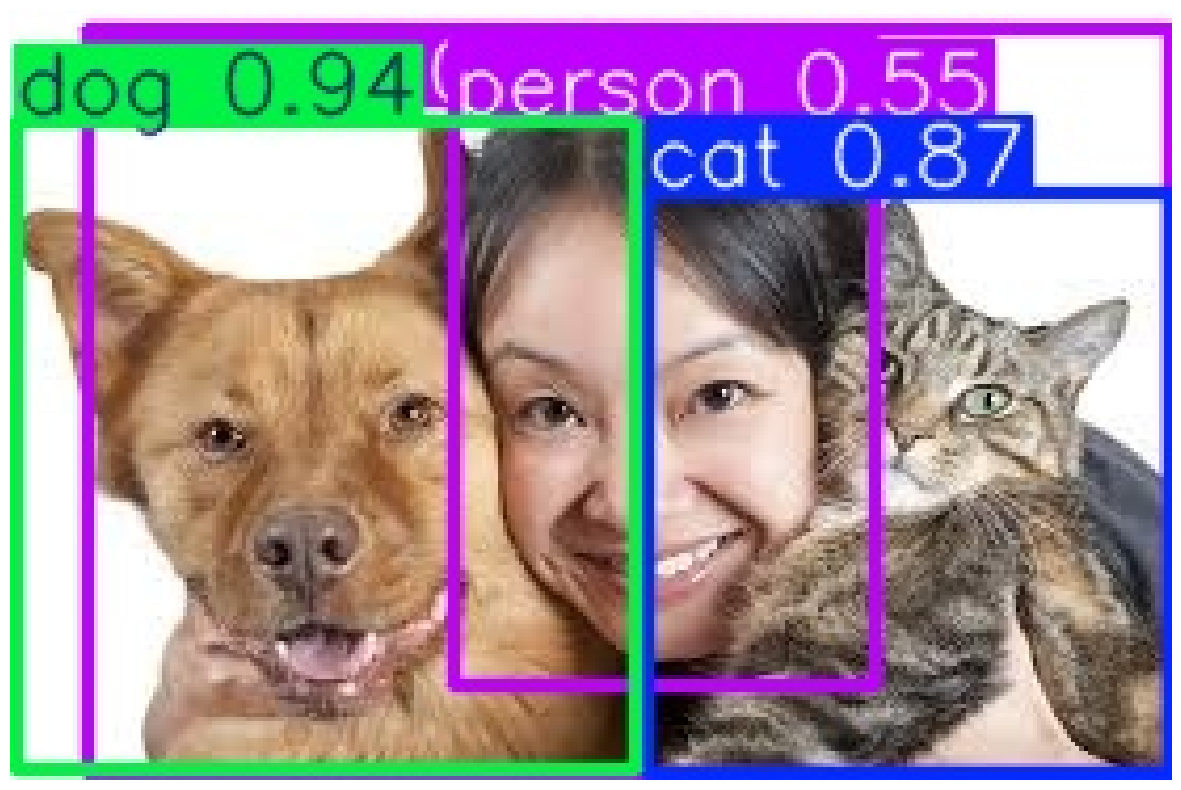

In [18]:
results = model(image_path)
results[0].save(filename='predictions.jpg')

mostrar('predictions.jpg')